### PREDICTING OF BREAST CANCER USING MACHINE LEARNING
This note boook make use of python based libraries in predicting if a person has breast cancer or not.

The following approach will be used 
1. Problem Definition 
2. Data
3. Evaluation 
4. Features 
5. Modelling 
6. Experimentation

## 1. Problem Definition 
The aim of this project is to use machine learning algorithm to predict if a person has breast cancer or not.

## 2. Data 
The data used is load from Scikit learn datasets for machine learning

### Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

#### Creator

* Dr. William H. Wolberg, General Surgery Dept. University of Wisconsin, Clinical Sciences Center Madison, WI 53792 wolberg '@' eagle.surgery.wisc.edu

* W. Nick Street, Computer Sciences Dept. University of Wisconsin, 1210 West Dayton St., Madison, WI 53706 street '@' cs.wisc.edu 608-262-6619

* Olvi L. Mangasarian, Computer Sciences Dept. University of Wisconsin, 1210 West Dayton St., Madison, WI 53706 olvi '@' cs.wisc.edu

## 3. Evaluation 
During this project is defined by the ability of the model to reach 95% accuracy and precision.

## 4. Features
#### Data Dictionary 

* Radius (mean of distances from center to points on the perimeter)
* Texture (standard deviation of gray-scale values)
* Perimeter
* Area
* Smoothness (local variation in radius lengths)
* Compactness (perimeter^2 / area - 1.0)
* Concavity (severity of concave portions of the contour)
* Concave points (number of concave portions of the contour)
* Symmetry
* Fractal dimension ("coastline approximation" - 1)
* Target 1=Benign 0=Malignant cancer




## Preparing of  Tools Analysis

In [1]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df= pd.DataFrame(data= cancer.data, columns= cancer.feature_names)
df["target"]= cancer.target

df.head(4)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0


In [3]:
df.describe()
df.shape

(569, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Exploratory Data Analysis 

In [5]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


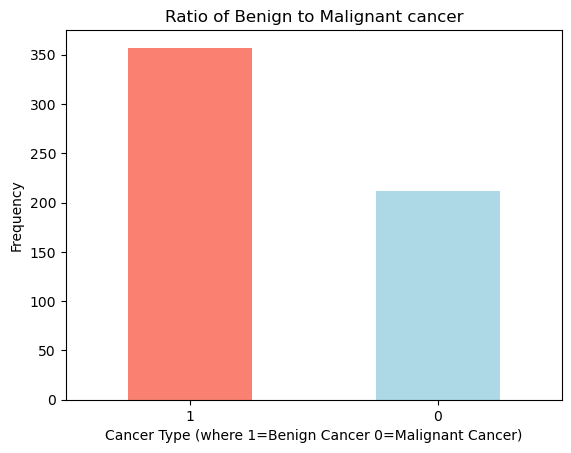

In [6]:
df["target"].value_counts().plot(kind="bar",
                                color=["salmon","lightblue"],
                                title="Ratio of Benign to Malignant cancer",
                                xlabel="Cancer Type (where 1=Benign Cancer 0=Malignant Cancer)",
                                ylabel="Frequency")

plt.xticks(rotation=0);

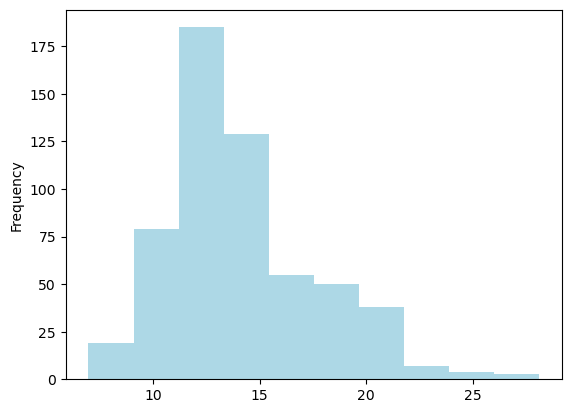

In [7]:
df["mean radius"].plot.hist(color="lightblue");

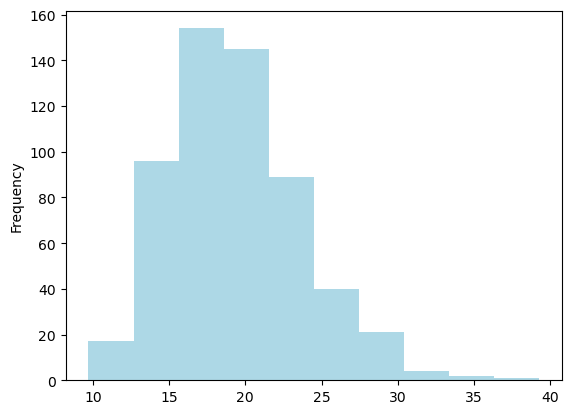

In [8]:
df["mean texture"].plot.hist(color="lightblue");

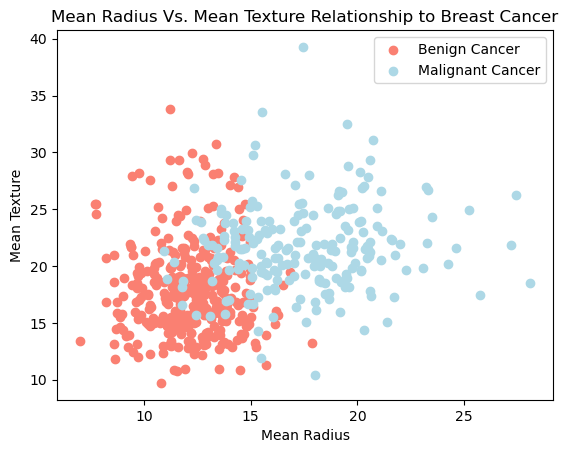

In [9]:
plt.scatter([df["mean radius"][df["target"]==1]],[df["mean texture"][df["target"]==1]],
           color="salmon")

plt.scatter([df["mean radius"][df["target"]==0]],[df["mean texture"][df["target"]==0]],
           color="lightblue")

plt.legend(["Benign Cancer", "Malignant Cancer"])
plt.title("Mean Radius Vs. Mean Texture Relationship to Breast Cancer")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture");

## Correlation Matrix and Visualization 

In [10]:
df_corr = df.corr()
df_corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


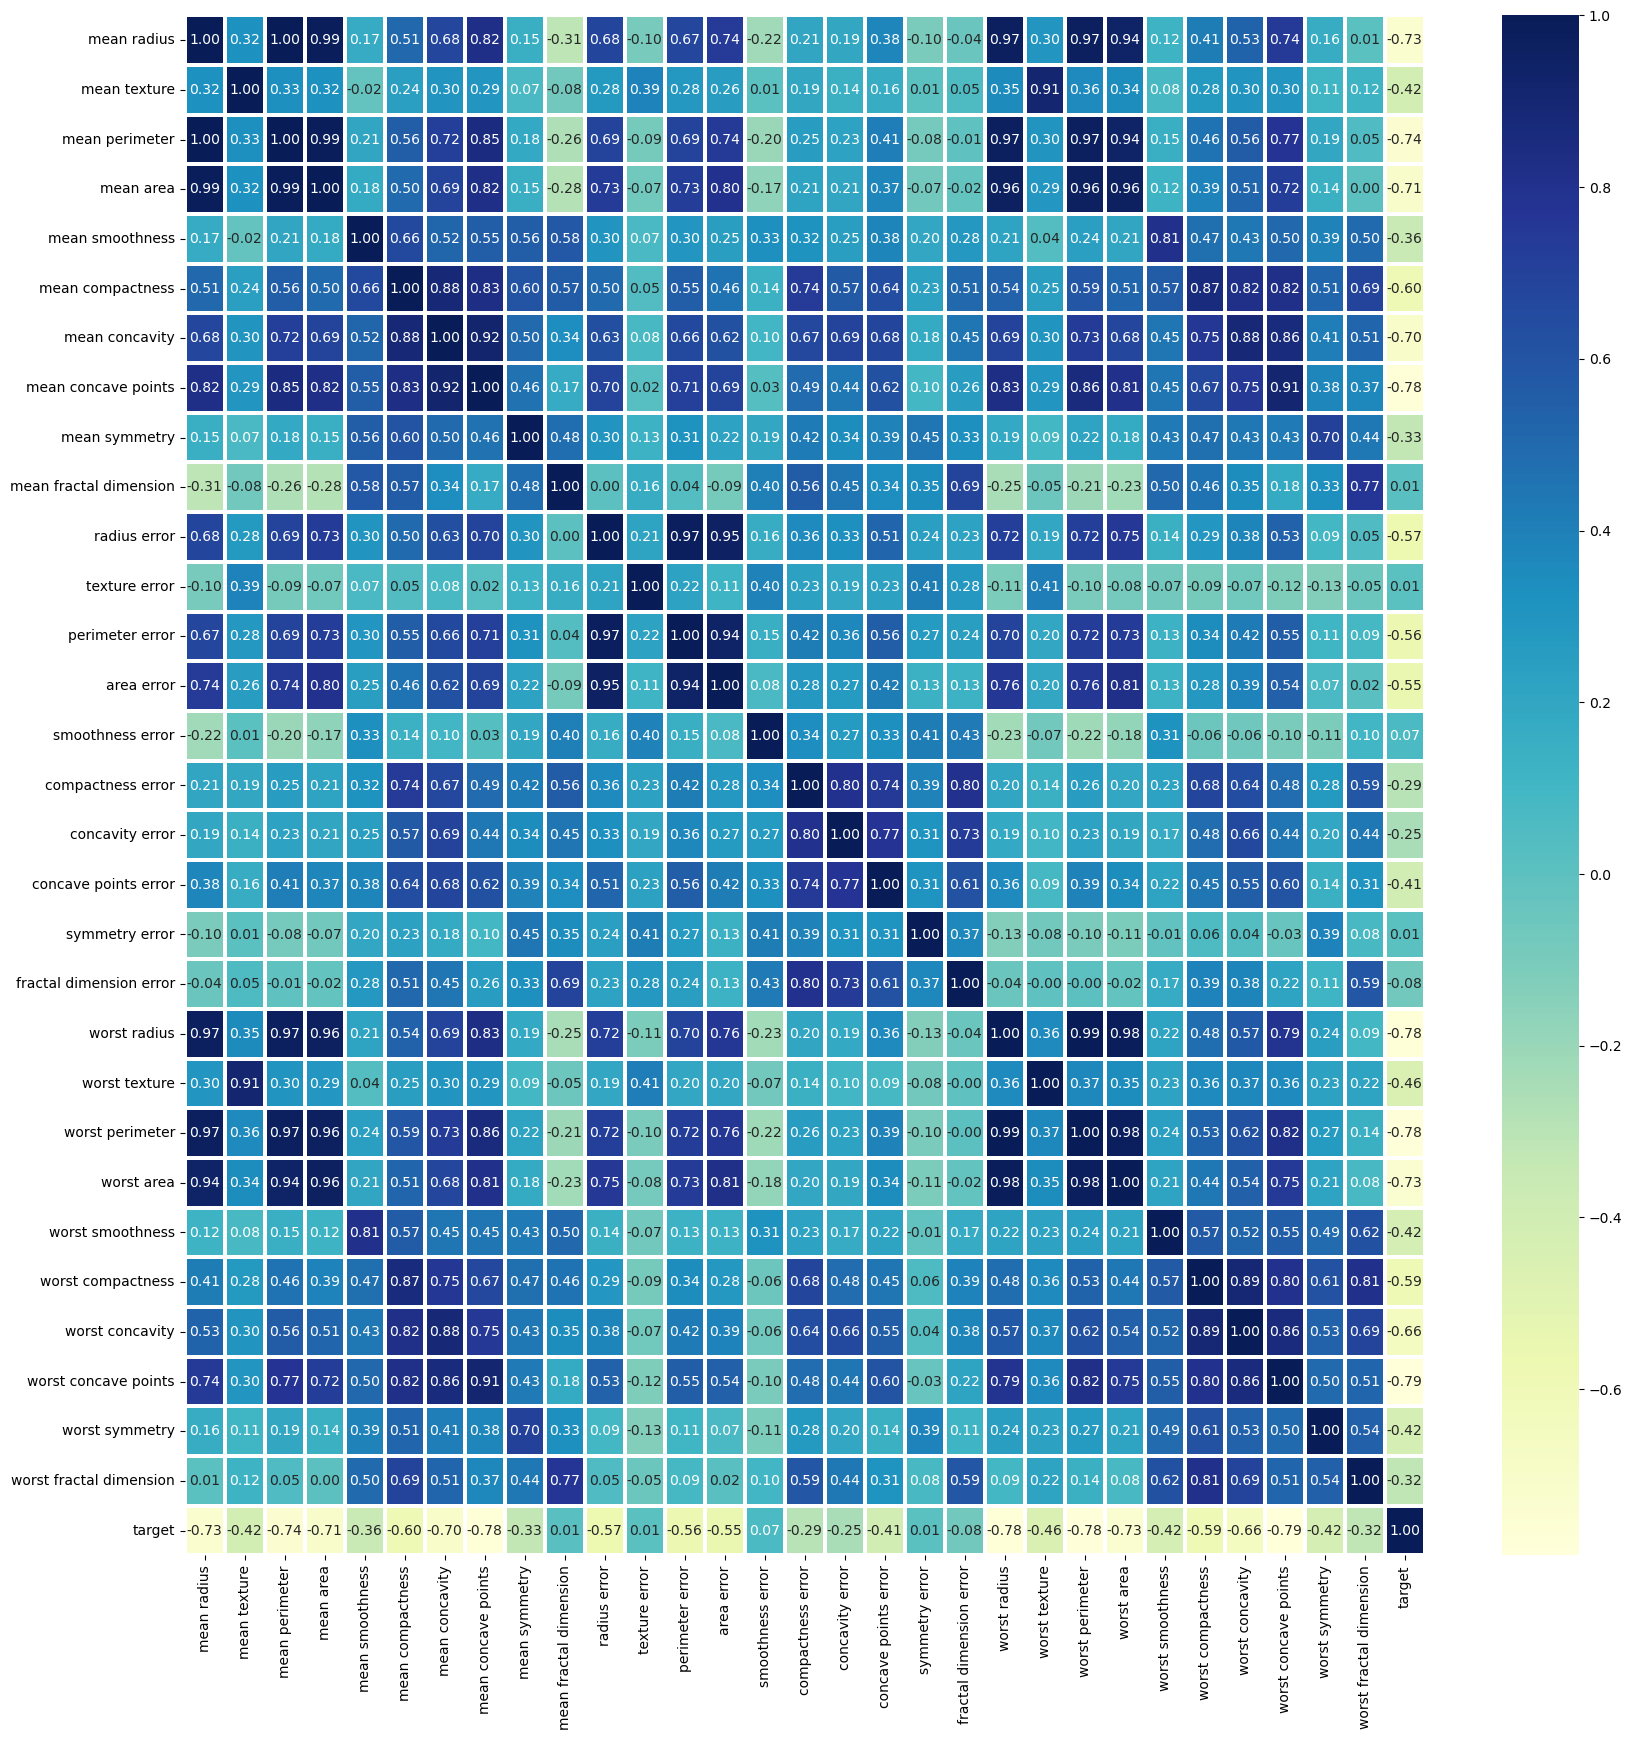

In [11]:
fig,ax = plt.subplots(figsize=(20,20))

ax= sns.heatmap(df_corr,
                annot=True,
               linewidths=1.5,
               fmt="0.2f",
               cmap="YlGnBu")

## Modelling

In [41]:
## Loading of Tools

from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import f1_score, recall_score,precision_score,confusion_matrix,recall_score,plot_roc_curve,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [13]:
## Splitting of Data to X and Y

x= df.drop("target", axis=1)
y= df["target"]

## Splitting Data into Train and Test

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)


In [14]:
## Comparing Accuracy of Models (Random Forest, KNN, LogisticRegression, DecisionTree, GaussianNB)

models = {
    "RandomForest" : RandomForestClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Logistic Regression" : LogisticRegression(solver='liblinear'),
    "Decision Tree" : DecisionTreeClassifier(),
    "Gaussian" : GaussianNB()
}

def model_compare (models,x_train,y_train,x_test,y_test):
    ## Setting seed
    np.random.seed(45)
    
    models_score = {}
    ## Looping through our dictioary
    for names,model in models.items():
        clf = model.fit(x_train, y_train)
        models_score[names] = clf.score(x_test,y_test)
    return models_score
    

In [15]:
mod_compare = model_compare(models=models,
                            x_train=x_train,
                            y_train=y_train,
                            x_test=x_test,
                            y_test=y_test)
model_df = pd.DataFrame(mod_compare,index=["Accuracy"])
model_df

,RandomForest,KNN,Logistic Regression,Decision Tree,Gaussian
Accuracy,0.95614,0.903509,0.929825,0.938596,0.912281


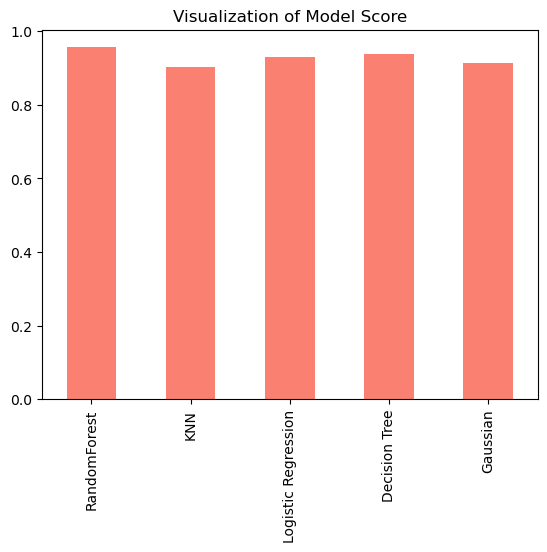

In [16]:
## Model Comparison Viz.

model_com = model_df.T.plot.bar(title="Visualization of Model Score",
                   legend=False,
                   color="salmon");


## Hyperparameter Tuning and Evaluation 
 Tuning of hyperparameters of models to know whichone doing better on test data, inorder to overfitting of machine learning model.

In [18]:
## Tuning of Decision Tree and KNeighbors

d_training_score = []
d_test_score = []
k_training_score = []
k_test_score = []

##Settingup of range.
value = range(1,21)

model_d = DecisionTreeClassifier()
model_k = KNeighborsClassifier()
## Looping through 

for i in value:
    model_d.set_params(max_depth=i)
    model_k.set_params(n_neighbors=i)
    
    model_d.fit(x_train, y_train)
    model_k.fit(x_train, y_train)
    
    d_training_score.append(model_d.score(x_train,y_train))
    d_test_score.append(model_d.score(x_test,y_test))
    k_training_score.append(model_k.score(x_train,y_train))
    k_test_score.append(model_k.score(x_test,y_test))



The maximum Train and Test Score, Train Score:100.000000% Test Score:94.736842%


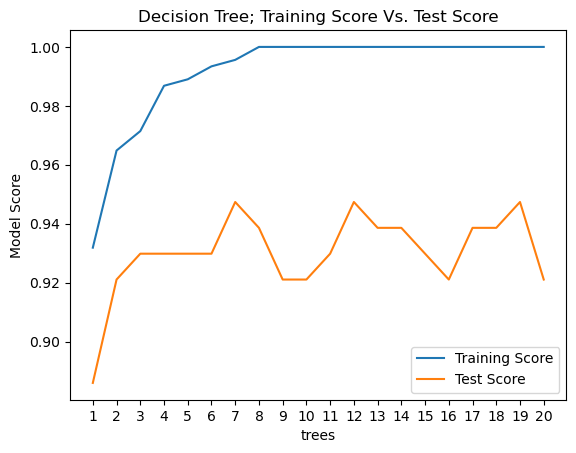

In [19]:
plt.plot(value,d_training_score, label="Training Score")
plt.plot(value,d_test_score, label="Test Score")

plt.xlabel("trees")
plt.ylabel("Model Score")
plt.title("Decision Tree; Training Score Vs. Test Score")
plt.legend()

plt.xticks(np.arange(1,21,1));

print(f"The maximum Train and Test Score, Train Score:{max(d_training_score)*100:2f}% Test Score:{max(d_test_score)*100:2f}%")

The maximum Train and Test Score, Train Score:100.000000% Test Score:92.105263%


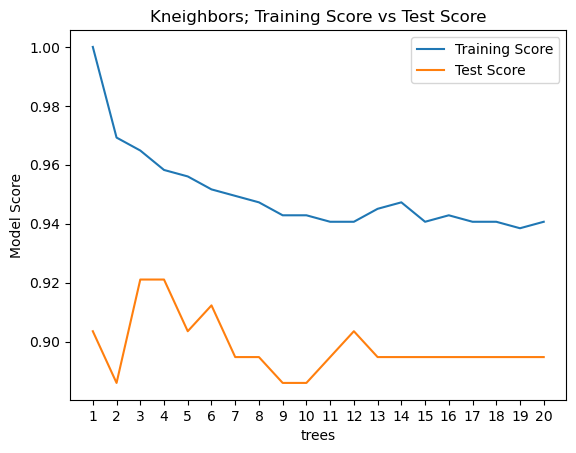

In [20]:
plt.plot(value,k_training_score, label="Training Score")
plt.plot(value,k_test_score, label="Test Score")

plt.xlabel("trees")
plt.ylabel("Model Score")
plt.title("Kneighbors; Training Score vs Test Score")
plt.legend()

plt.xticks(np.arange(1,21,1));

print(f"The maximum Train and Test Score, Train Score:{max(k_training_score)*100:2f}% Test Score:{max(k_test_score)*100:2f}%")

In [21]:
## Tuning of LogisticRegression, RandomForest and GaussianNB

lr = {
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}

rf = {
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None, 3, 5, 10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf" : np.arange(1,20,2)
}

gn = {
    "var_smoothing" : np.logspace(0,-9, num=100)
}


## Tuning using RandomizedSearchCV

lr_t = RandomizedSearchCV(LogisticRegression(),
                         param_distributions=lr,
                         cv=5,
                         n_iter=20,
                         verbose=True)

lr_t.fit(x_train,y_train)

lr_t.score(x_test,y_test)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.9473684210526315

In [22]:
lr_t.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [23]:
## Tuning RandomForest using RandomizedSearchCV

rf_t = RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf,
                         cv=5,
                         n_iter=20,
                         verbose=True)

rf_t.fit(x_train,y_train)

rf_t.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.956140350877193

In [28]:
rf_t.best_params_

{'n_estimators': 860,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': None}

In [25]:
gn_t = RandomizedSearchCV(GaussianNB(),
                         param_distributions=gn,
                         cv=5,
                         n_iter=5,
                         verbose=True)
gn_t.fit(x_train, y_train)

gn_t.score(x_test, y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.8859649122807017

In [26]:
model_df

,RandomForest,KNN,Logistic Regression,Decision Tree,Gaussian
Accuracy,0.95614,0.903509,0.929825,0.938596,0.912281


From our experiment above it noted that RandomForest better than the rest of the machine learning model and would be tune further using GridSearchCV for better accuracy and performance

In [ ]:
## Tuning RandomForest using GridSearchCV

# rf = {
#     "n_estimators":np.arange(10,1000,50),
#     "max_depth":[None, 3, 5, 10],
#     "min_samples_split": np.arange(2,20,2),
#     "min_samples_leaf" : np.arange(1,20,2)
# }


# rf_g = GridSearchCV(RandomForestClassifier(),
#                    param_grid=rf,
#                    cv=5,
#                    verbose=True)

# rf_g.fit(x_train,y_train)


## Model Evaluation 
* ROC Curve
* Confusion Matrix
* Classification Report



In [27]:
rf_t.predict(x_test)

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0])

In [32]:
y_preds = rf_t.predict(x_test)

y_preds

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0])

In [34]:
y_test

22     0
44     0
557    1
439    1
399    1
      ..
3      0
336    1
285    1
72     0
91     0
Name: target, Length: 114, dtype: int64

/Users/Daniel/Desktop/analysis_env/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


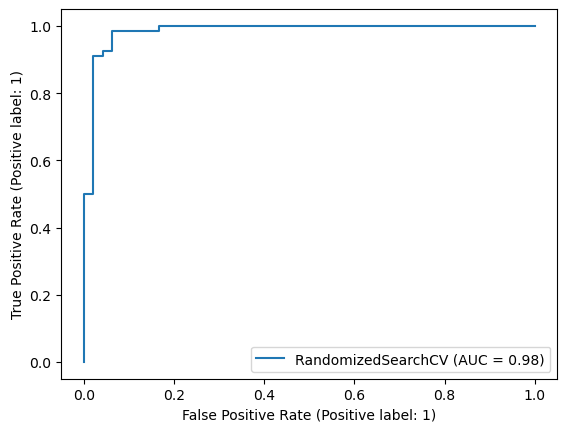

In [36]:
## Plot ROC CURVE

plot_roc_curve(rf_t, x_test, y_test);

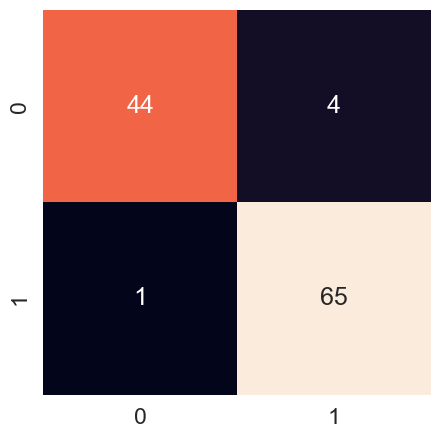

In [39]:
### Confusion Matrix 

sns.set(font_scale=1.5)

fig,ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                annot=True,
                cbar=False)

In [42]:
## Classification Report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        48
           1       0.94      0.98      0.96        66

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [43]:
rf_t.best_params_

{'n_estimators': 860,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': None}

In [55]:
## Cross Validation of our Accuracy, f1-report, and Precision

clf = RandomForestClassifier(n_estimators=860,
                             max_depth = None,
                             min_samples_split = 12,
                             min_samples_leaf = 1)

cv_accuracy = cross_val_score(clf,
                             x,
                             y,
                             cv=5,
                             scoring="accuracy")

cv_accuracy = np.mean(cv_accuracy)

cv_accuracy

cv_f1 = cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

cv_recall = cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9691314553990612

In [56]:
## Cross Validation Metrics 

cross_val_metrics = {
    "Accuracy":cv_accuracy,
    "f1_score":cv_f1,
    "Recall" : cv_recall
}

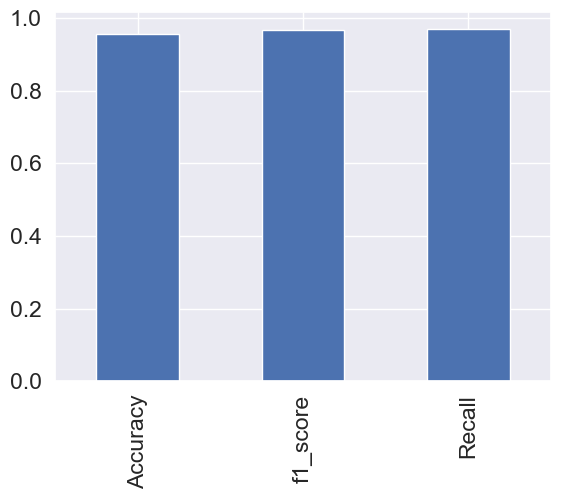

In [63]:
cross_val_met_df = pd.DataFrame(cross_val_metrics, index=[0])

cross_val_met_df.T.plot(kind="bar", legend=False);

## Feature Importance 

Feature importance would help us understand which of our feature is important to our machine learning prediction

In [65]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [66]:
clf = RandomForestClassifier(n_estimators=860,
                             max_depth = None,
                             min_samples_split = 12,
                             min_samples_leaf = 1)

clf.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=12, n_estimators=860)

In [67]:
clf.feature_importances_

array([0.04422607, 0.0106805 , 0.04329672, 0.05633325, 0.00382437,
       0.01212026, 0.04758842, 0.08948936, 0.00148268, 0.00200734,
       0.01393678, 0.00357789, 0.01636755, 0.03767044, 0.00215226,
       0.00176856, 0.00365902, 0.00330718, 0.00276142, 0.00231493,
       0.14091889, 0.01224961, 0.1282702 , 0.11814451, 0.01070023,
       0.01386451, 0.03592535, 0.12795322, 0.00737746, 0.00603104])

In [69]:
feature_dict = dict(zip(df.columns, list(clf.feature_importances_)))
feature_dict

{'mean radius': 0.04422606914546971,
 'mean texture': 0.010680500712944385,
 'mean perimeter': 0.043296716586784405,
 'mean area': 0.056333246968157245,
 'mean smoothness': 0.003824374701098635,
 'mean compactness': 0.012120262885662621,
 'mean concavity': 0.04758841510721614,
 'mean concave points': 0.08948936182039789,
 'mean symmetry': 0.0014826821232850444,
 'mean fractal dimension': 0.002007340021551456,
 'radius error': 0.013936781911589714,
 'texture error': 0.0035778861497083475,
 'perimeter error': 0.016367548347648475,
 'area error': 0.03767043548778319,
 'smoothness error': 0.002152258079929713,
 'compactness error': 0.0017685609064917829,
 'concavity error': 0.0036590193883898393,
 'concave points error': 0.0033071805405517477,
 'symmetry error': 0.00276141811623629,
 'fractal dimension error': 0.0023149342523725905,
 'worst radius': 0.14091889344673753,
 'worst texture': 0.012249608579227828,
 'worst perimeter': 0.12827019722231126,
 'worst area': 0.11814451088718252,
 'wo

In [70]:
feature_dict_df = pd.DataFrame(feature_dict, index=[0])
feature_dict_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.044226,0.010681,0.043297,0.056333,0.003824,0.01212,0.047588,0.089489,0.001483,0.002007,...,0.140919,0.01225,0.12827,0.118145,0.0107,0.013865,0.035925,0.127953,0.007377,0.006031


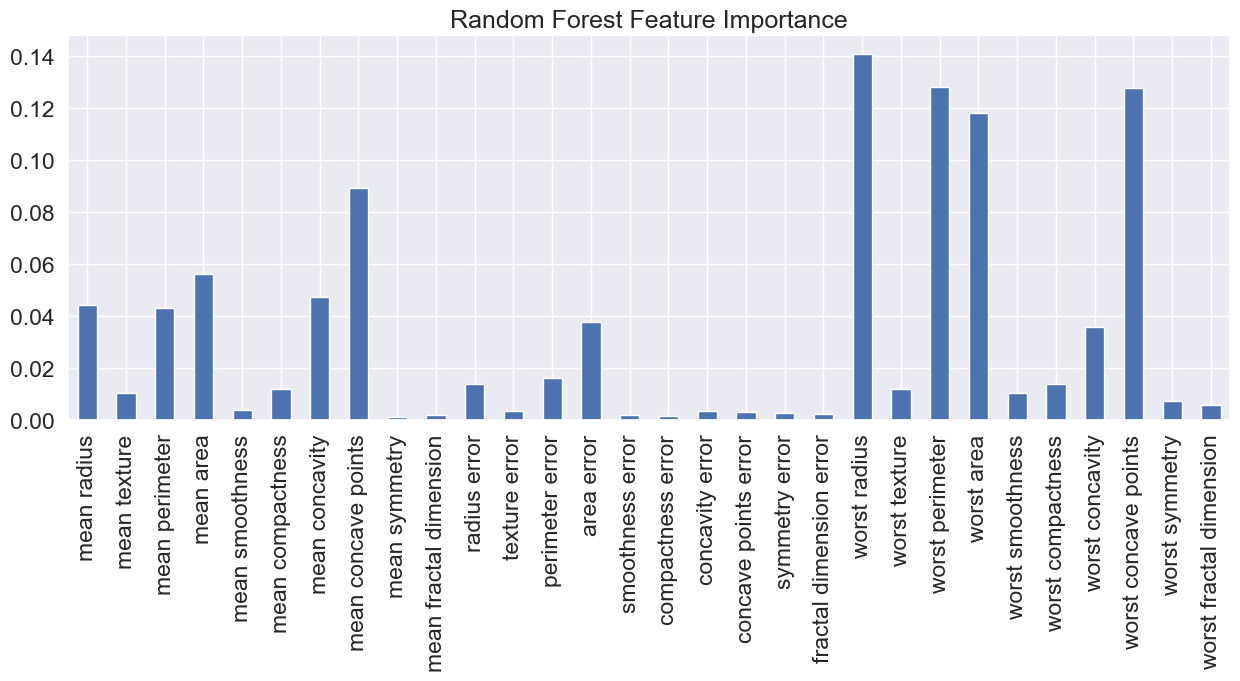

In [88]:
feature_dict_df.T.plot(kind="bar", figsize=(15,5), title="Random Forest Feature Importance", legend=False);